In [1]:
from datetime import datetime

%matplotlib inline
import pylab
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Image as ipyImage
from sklearn.datasets.samples_generator import make_blobs

#from cLoops.io import parseJd
from sklearn.cluster import DBSCAN
from cLoops.cDBSCAN import cDBSCAN as cDBSCAN
from cLoops.cDBSCAN2 import cDBSCAN as cDBSCAN2
from blockDBSCAN import blockDBSCAN as bDBSCAN

In [2]:
sns.set_style("white")

In [3]:
def getData(r=1, samples=5000, std1=0.2, centercounts=5,rmax=200):
    centers = []
    for i in range(centercounts):
        x,y = np.random.randint(0-rmax,rmax),np.random.randint(0-rmax,rmax)
        centers.append([x,y])
    #data as true clusters
    X, xlabels = make_blobs(n_samples=samples,
                            centers=centers,
                            cluster_std=std1,
                            random_state=0)
    Y = []
    if r > 0:
        for i in range(int(samples*r)):
            x,y = np.random.random()*rmax,np.random.random()*rmax
            rx = np.random.random()
            ry = np.random.random()
            if rx < 0.5:
                x = 0-x
            if ry < 0.5:
                y = 0-y
            Y.append([x,y])
        ylabels = np.zeros(len(Y)) -1.0
    Y = np.array(Y)
    mat = np.concatenate((X, Y), axis=0)
    data = [] 
    for i in range(len( mat )):
        data.append( [ i,mat[ i,0 ],mat[ i,1 ] ] )
    data = np.array( data )
    return X, xlabels, Y, ylabels, data

In [11]:
def plotax(ax,ds,labels,xlim,ylim,pre):
    ys = pd.Series(labels)
    for i,key in enumerate(list(set(labels.values()))):
        #print(key)
        ny = ys[ys==key]
        #print(len(ny))
        if len(ny) == 0:
            continue
        x = list(ds.loc[ny.index,"X"])
        y = list(ds.loc[ny.index,"Y"])
        ax.plot(x,y,"ro")
        """
        if i%2 == 0:
            ax.plot(x,y,"ro")
        else:
            ax.plot(x,y,"b^")
        """
    ax.set_title(pre)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

In [14]:
def oneCompare(r,cs,repeats=5):
    print("noise ratio:%s, centers:%s"%(r,cs))
    X,xlabels,Y,ylabels,data = getData(r=r,centercounts=cs)
    xlim = [np.min(data[:,1]),np.max(data[:,1])]
    ylim = [np.min(data[:,2]),np.max(data[:,2])]
    data2 = pd.DataFrame({"X":data[:,1],"Y":data[:,2]},index=data[:,0])
    
    fig, axs = pylab.subplots(1,5,figsize=(20,4))
    axs[0].scatter(X[:,0],X[:,1],color="red",s=1.0) 
    axs[0].scatter(Y[:,0],Y[:,1],color="gray",s=0.5)
    axs[0].set_title("raw data")
    axs[0].set_xlim(xlim)
    axs[0].set_ylim(ylim)
    #axs[0] = sns.kdeplot( X[:,0] , X[:,1],cmap="Reds",shade=True,ax=axs[0])
    #axs[0] = sns.kdeplot( Y[:,0], Y[:,1],cmpa="Grays",shade=True,ax=axs[0])
    
    #run all kinds of DBSCAN
    #sklern DBSCAN
    s = datetime.now()
    for i in range(repeats):
        labels = DBSCAN(eps=0.2,min_samples=100).fit(data[:,1:]).labels_
    t = datetime.now() - s 
    labels = { i:p for i,p in enumerate(labels) if p!=-1}
    axs[1] = plotax( axs[1],data2,labels,xlim,ylim,"sklearn DBSCAN:%s\ntime: %s"%(len(set(labels.values())),str(t)))
    
    #our original cDBSCAN
    s = datetime.now()
    for i in range(repeats):
        clabels = cDBSCAN(data,0.2,100).labels
    t = datetime.now() - s 
    axs[2] = plotax( axs[2],data2,clabels,xlim,ylim,"cDBSCAN:%s\ntime: %s"%(len(set(clabels.values())),str(t)))

    
    #our improve cDBSCAN2
    s = datetime.now()
    for i in range(repeats):
        clabels2 = cDBSCAN2(data,0.2,100).labels
    t = datetime.now() - s 
    axs[3] = plotax( axs[3],data2,clabels2,xlim,ylim,"cDBSCAN2:%s\ntime: %s"%(len(set(clabels2.values())),str(t)))

    #our improved gDBSCAN
    s = datetime.now()
    for i in range(repeats):
        blabels = bDBSCAN(data,0.2,100).labels  
    t = datetime.now() - s 
    axs[4] = plotax( axs[4],data2,blabels,xlim,ylim,"blockDBSCAN:%s\ntime: %s"%(len(set(blabels.values())),str(t)))
    
    pylab.show()

noise ratio:0.2, centers:4


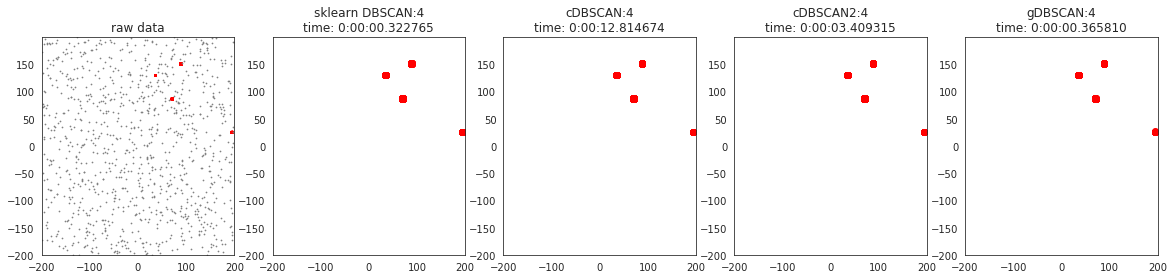

noise ratio:0.5, centers:4


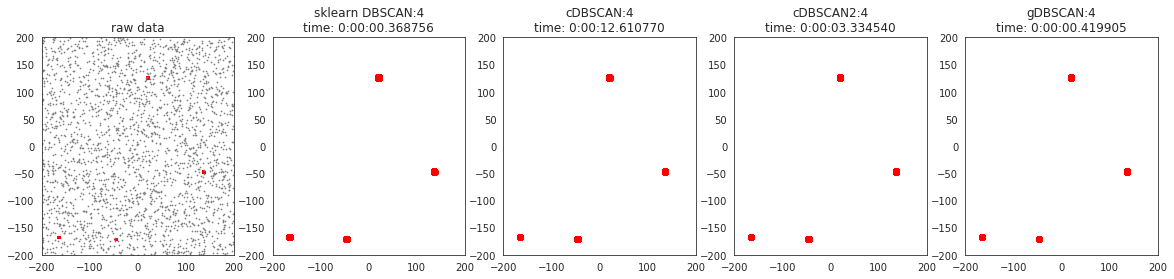

noise ratio:1, centers:4


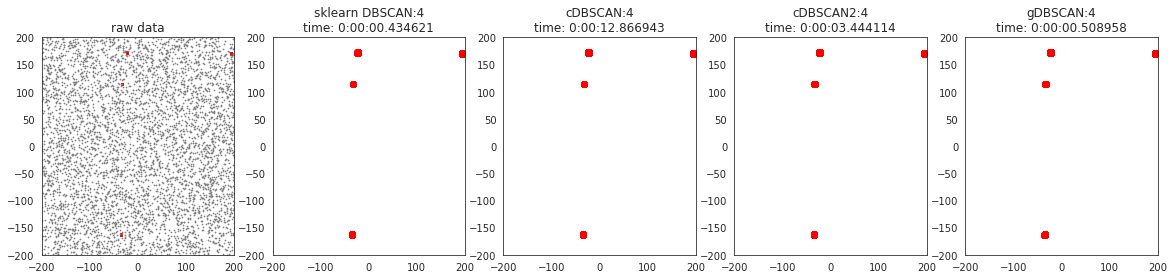

noise ratio:2, centers:4


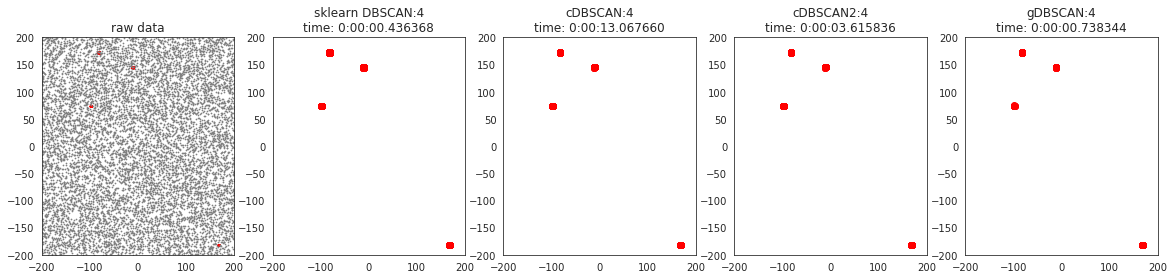

noise ratio:3, centers:4


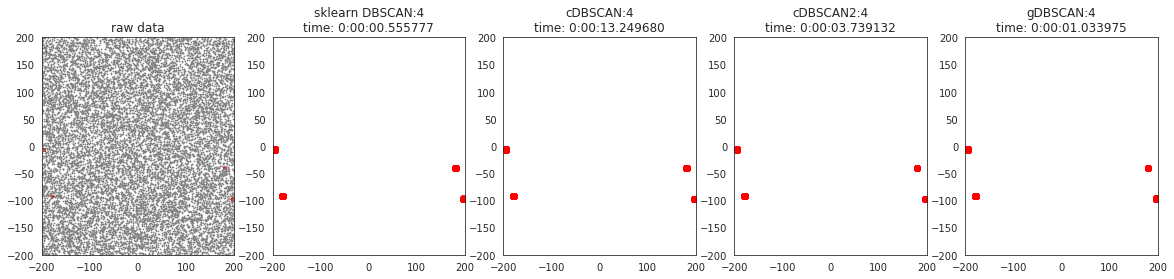

noise ratio:0.2, centers:6


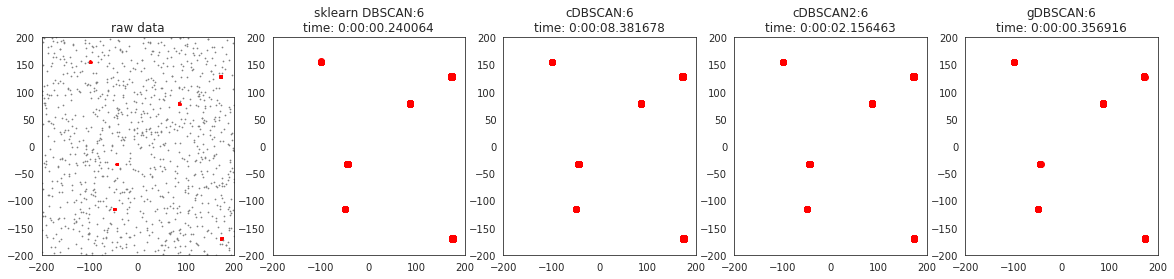

noise ratio:0.5, centers:6


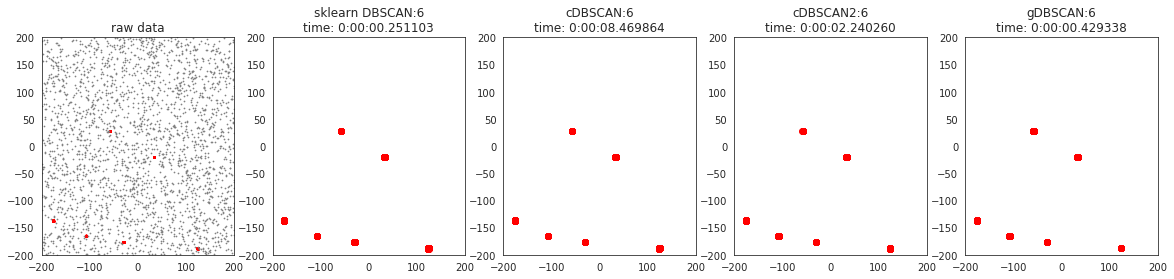

noise ratio:1, centers:6


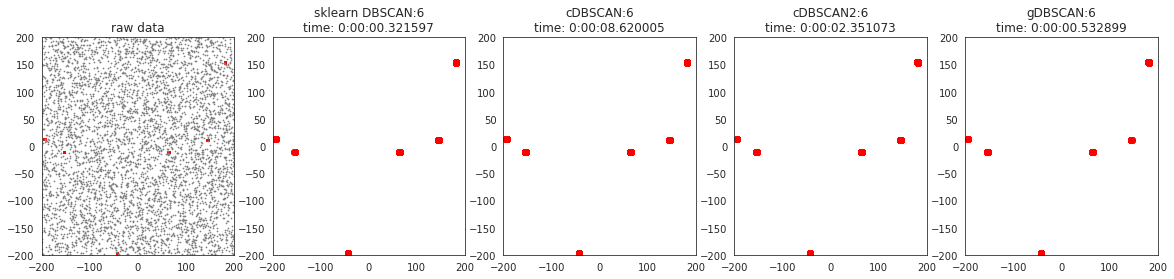

noise ratio:2, centers:6


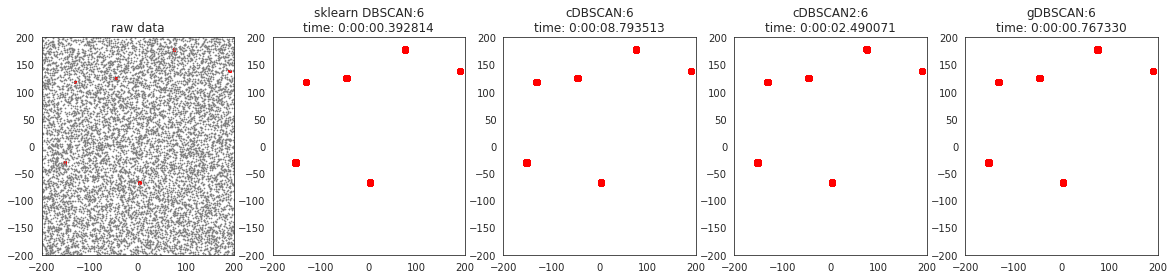

noise ratio:3, centers:6


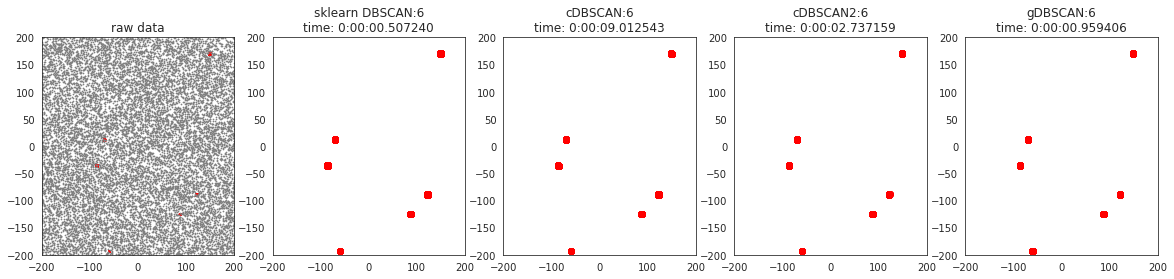

noise ratio:0.2, centers:8


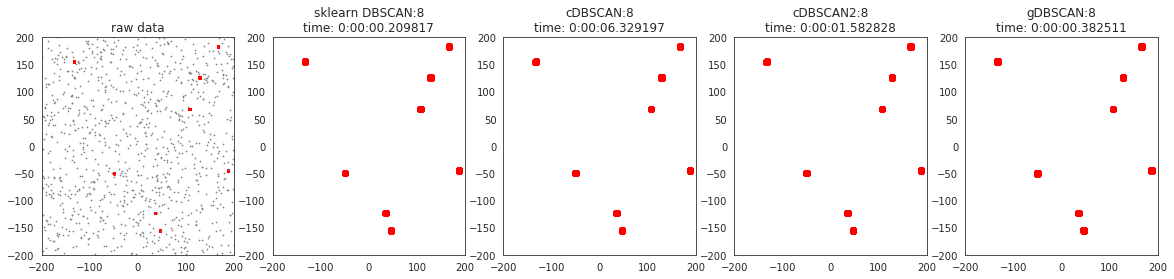

noise ratio:0.5, centers:8


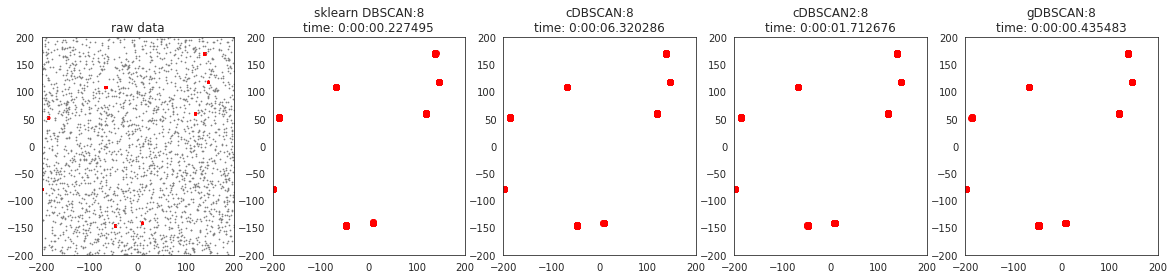

noise ratio:1, centers:8


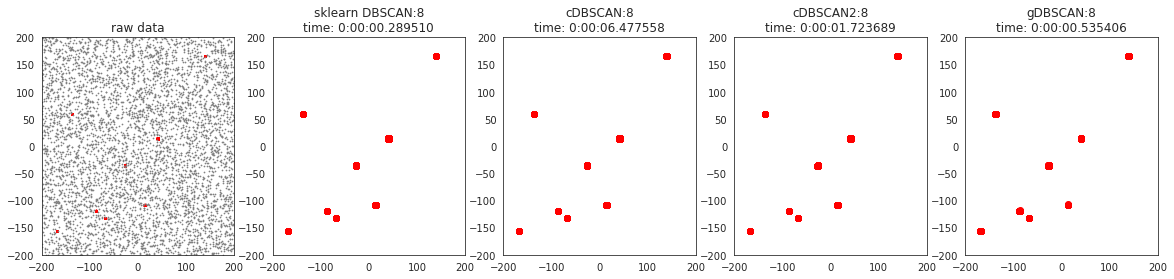

noise ratio:2, centers:8


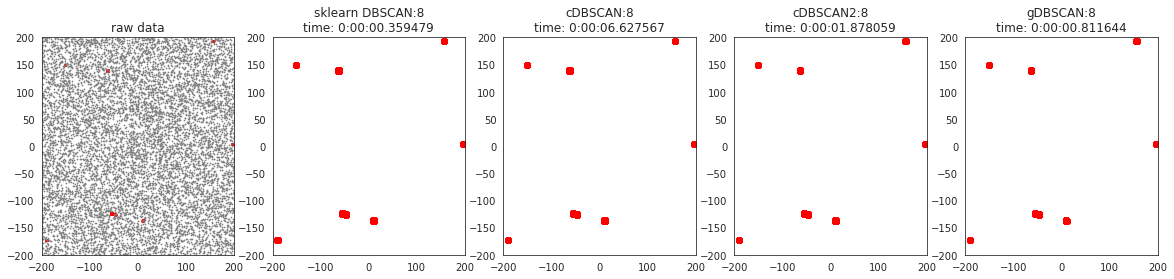

noise ratio:3, centers:8


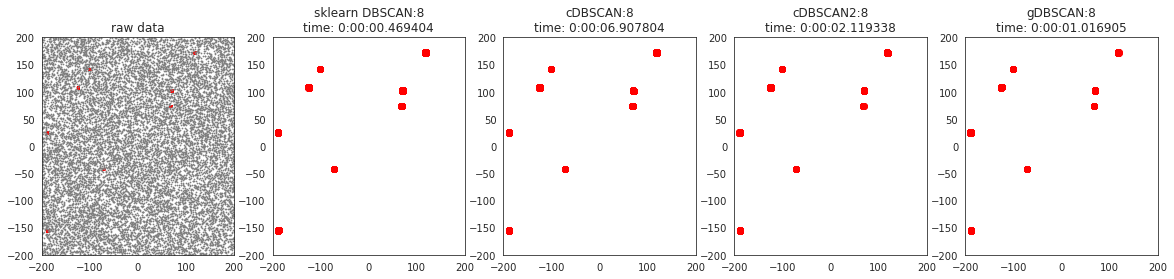

noise ratio:0.2, centers:10


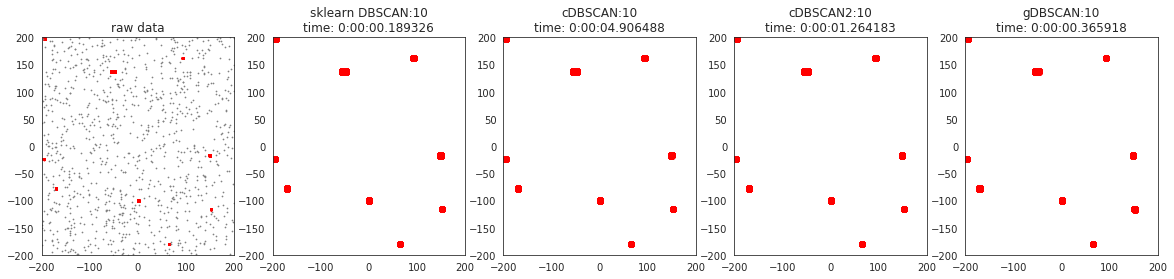

noise ratio:0.5, centers:10


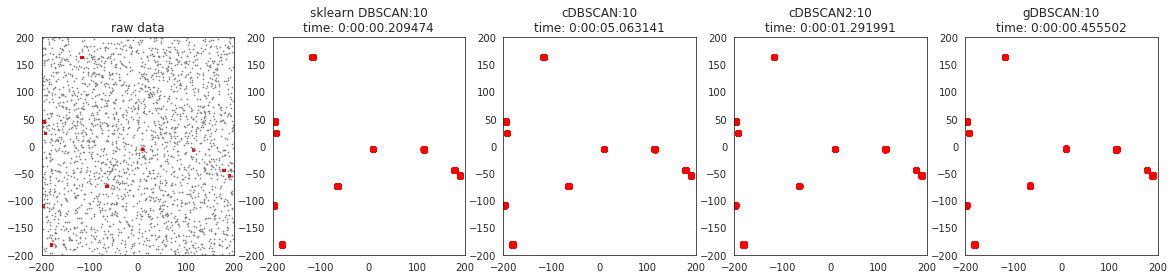

noise ratio:1, centers:10


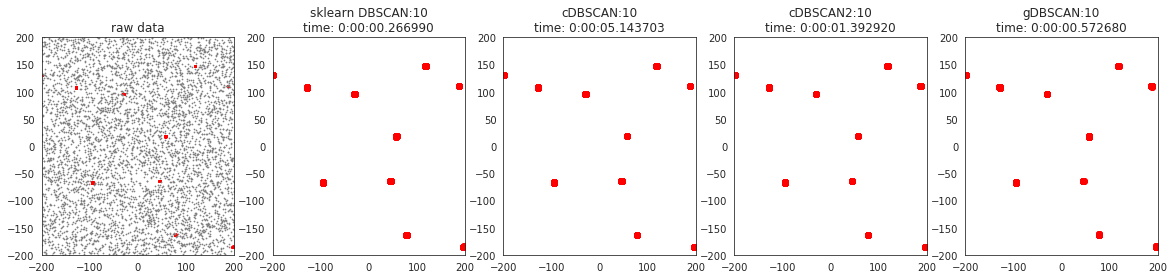

noise ratio:2, centers:10


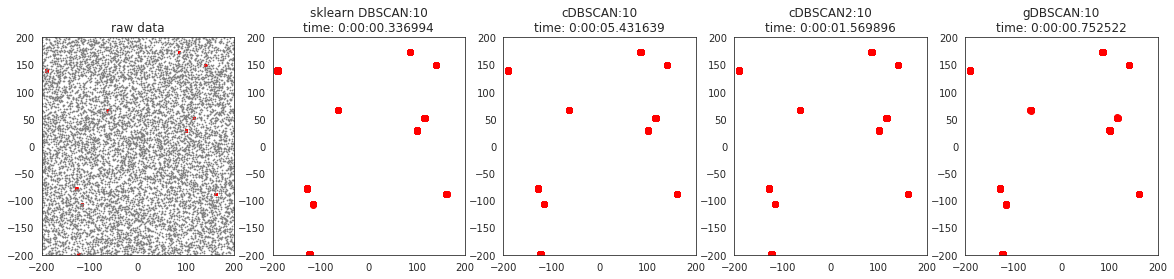

noise ratio:3, centers:10


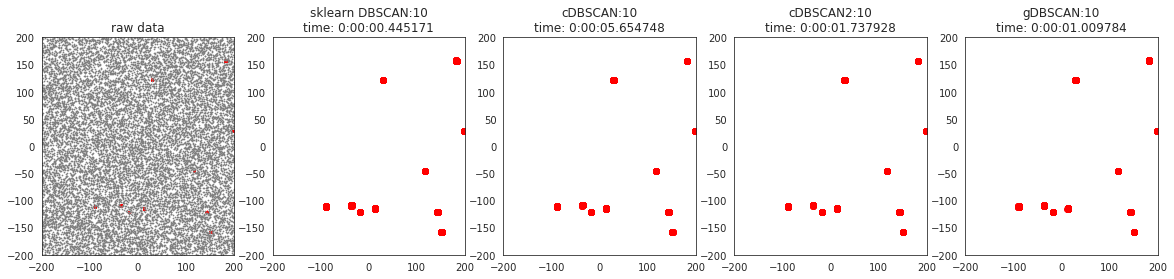

noise ratio:0.2, centers:15


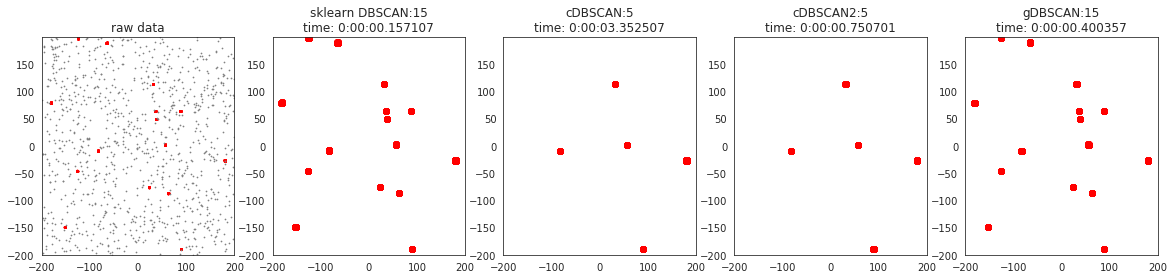

noise ratio:0.5, centers:15


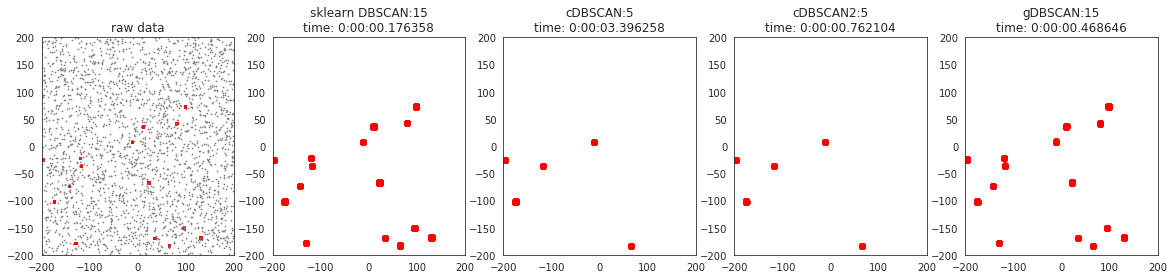

noise ratio:1, centers:15


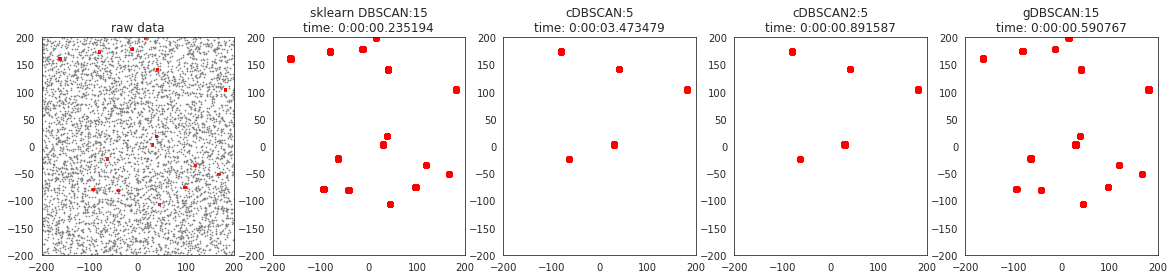

noise ratio:2, centers:15


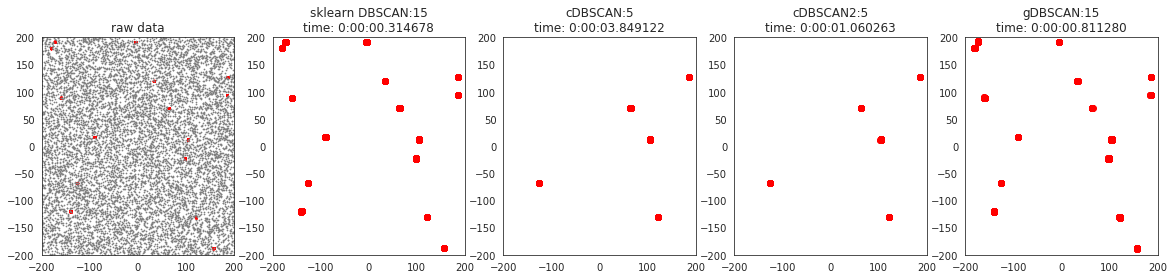

noise ratio:3, centers:15


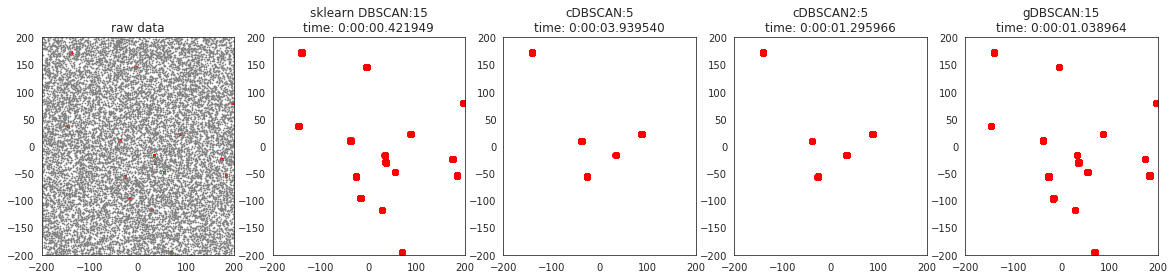

noise ratio:0.2, centers:20


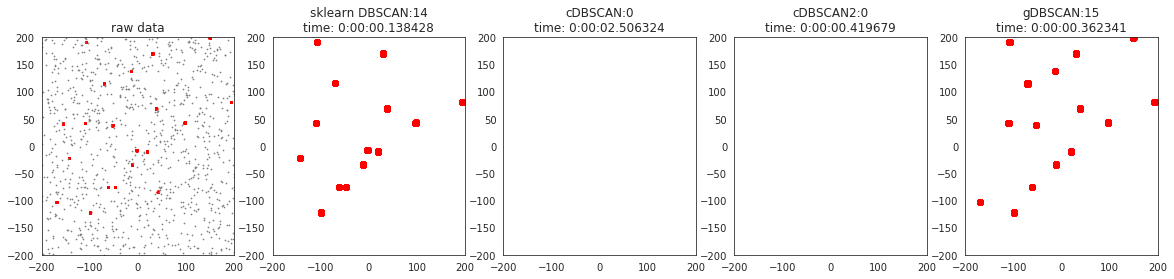

noise ratio:0.5, centers:20


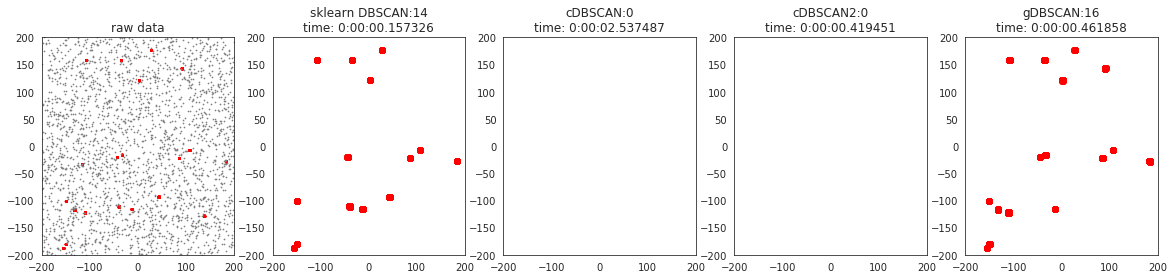

noise ratio:1, centers:20


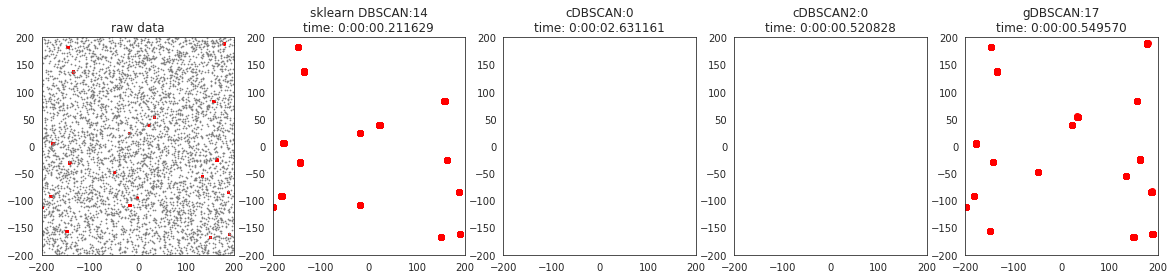

noise ratio:2, centers:20


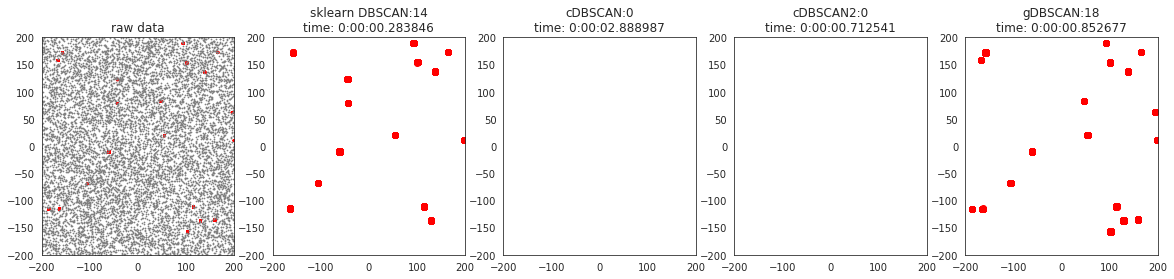

noise ratio:3, centers:20


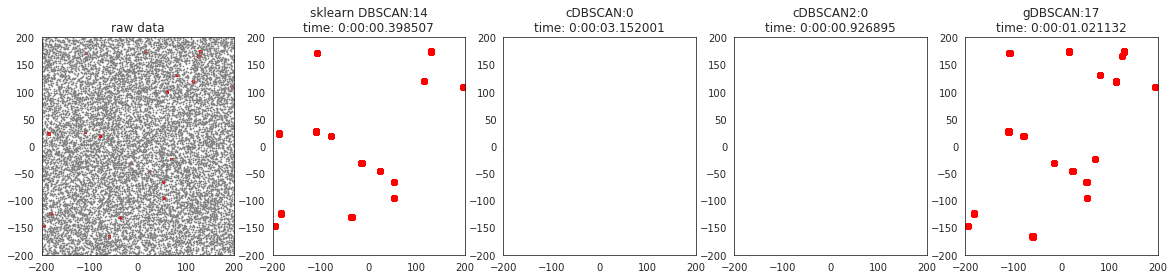

In [15]:
rs = [0.2,0.5,1,2,3]
cs = [4,6,8,10,15,20]
for c in cs:
    for r in rs:
        oneCompare(r,c)